In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [113]:
df = pd.read_csv("Summary_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62937 entries, 0 to 62936
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 62937 non-null  int64  
 1   Unnamed: 0                   62937 non-null  int64  
 2   matchID                      62937 non-null  object 
 3   timestamp                    62937 non-null  int64  
 4   puuid                        62937 non-null  object 
 5   teamID                       62937 non-null  int64  
 6   ID                           62937 non-null  int64  
 7   win                          62937 non-null  int64  
 8   championId                   62937 non-null  int64  
 9   championName                 62937 non-null  object 
 10  TeamPosition                 62937 non-null  object 
 11  individualPosition           62937 non-null  object 
 12  totalGold                    62937 non-null  int64  
 13  currentGold     

In [114]:
# Check if there is invalid position
df["TeamPosition"].value_counts()

TeamPosition
BOTTOM     12590
JUNGLE     12588
MIDDLE     12587
TOP        12586
UTILITY    12586
Name: count, dtype: int64

In [115]:
df.head(20)

,Unnamed: 0.1,Unnamed: 0,matchID,timestamp,puuid,teamID,ID,win,championId,championName,...,Teamriftherald,diff_riftherald_from_lose,Teambaron_nasher,diff_baron_nasher_from_lose,Diff_dragon,Diff_horde,Diff_riftherald,Diff_baron_nasher,diff_Gold_from_lose,Diff_Gold
0,0,78609,KR_6496730615,1823031,cDWaxtyZZ4APDCUaIj5aaRBbIqkFuclzsAm9FV_8MN489U...,200,9,0,498,Xayah,...,1,0.0,1,0.0,3.0,-0.0,-0.0,1.0,0.0,6133.0
1,1,78607,KR_6496730615,1823031,x6xHmme5Zyj0Af6XNg5zFfzyaQYMR0G_TNLonNJxgpjxN8...,200,7,0,59,JarvanIV,...,1,0.0,1,0.0,3.0,-0.0,-0.0,1.0,0.0,874.0
2,2,78608,KR_6496730615,1823031,t-J_Z2HpUtsA7B_hOATyNdvq07kTwAwFo6NZz4cC9p4XKP...,200,8,0,777,Yone,...,1,0.0,1,0.0,3.0,-0.0,-0.0,1.0,0.0,1778.0
3,3,78606,KR_6496730615,1823031,JlzbjuDNxbT08Ii-8xXN_LO1y9pgnAoAsUZVOqaOzA0_2n...,200,6,0,54,Malphite,...,1,0.0,1,0.0,3.0,-0.0,-0.0,1.0,0.0,-2799.0
4,4,78610,KR_6496730615,1823031,gAHRDrWXJgrbxo9WU_xrnWFR7yAfKr1MmQx9kjzQuvqUg4...,200,10,0,201,Braum,...,1,0.0,1,0.0,3.0,-0.0,-0.0,1.0,0.0,-4799.0
5,5,190025,KR_6496730615,1823031,ZP7eFs99xpTL5MhvuH08kqAW5B20nLOndkDZRQ4ZSpTEDL...,100,4,1,523,Aphelios,...,1,0.0,0,-1.0,-3.0,0.0,0.0,-1.0,-6133.0,-6133.0
6,6,190023,KR_6496730615,1823031,Uc3uBSfLtGY5BNPCoDqGhDq-QMKPk6bdG3fdxYrPoH286c...,100,2,1,517,Sylas,...,1,0.0,0,-1.0,-3.0,0.0,0.0,-1.0,-874.0,-874.0
7,7,190024,KR_6496730615,1823031,xQzTwG1qqYNykz9tlTXZFsZ49-_SbEJGq-u5AAA6tZHTH5...,100,3,1,103,Ahri,...,1,0.0,0,-1.0,-3.0,0.0,0.0,-1.0,-1778.0,-1778.0
8,8,190022,KR_6496730615,1823031,USmdp4jqOwB20ZprI7rRpV4BpmTFO2Aq9-HjU8ANmQVTyE...,100,1,1,82,Mordekaiser,...,1,0.0,0,-1.0,-3.0,0.0,0.0,-1.0,2799.0,2799.0
9,9,190026,KR_6496730615,1823031,KSa9furtWbESBkqmzq0FKVg_GW7gcDZvMNt3Oamb45ma0y...,100,5,1,126,Jayce,...,1,0.0,0,-1.0,-3.0,0.0,0.0,-1.0,4799.0,4799.0


In [116]:
# Check if there are duplicated rows
print(df.duplicated().sum())

# Reset index for encoding
df.reset_index(drop = True, inplace=True)
print(df.shape)

0
(62937, 36)


In [117]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' drops the first category to avoid multicollinearity

# Fit and transform the satisfaction columnX
transformed_data = encoder.fit_transform(df[["TeamPosition"]])

# Create a DataFrame from the transformed data with appropriate column names
transformed_df = pd.DataFrame(transformed_data, columns=encoder.get_feature_names_out(["TeamPosition"]))

# Concatenate the transformed columns with the original DataFrame
encoded_df = pd.concat([df, transformed_df], axis=1)


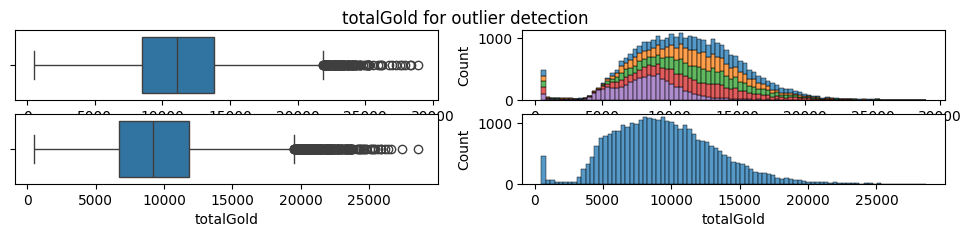

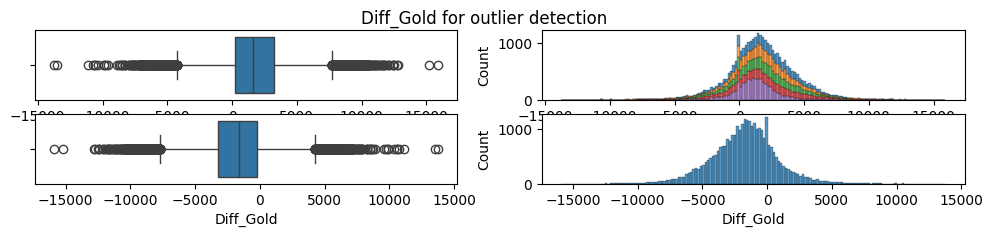

In [118]:
# Check data with visualiztion by creating ploter function
def outlierploter(da, column):
    fig, axes = plt.subplots(2, 2, figsize = (12, 2))
    fig.suptitle(f"{column} for outlier detection")
    sns.boxplot(ax = axes[0][0], data = da[da["win"] == 1], x = column)
    sns.histplot(ax = axes[0][1], data = da[da["win"] == 1], x = column, hue = "TeamPosition", multiple = "stack", legend = None)
    sns.boxplot(ax = axes[1][0], data = da[da["win"] == 0], x = column)
    sns.histplot(ax = axes[1][1], data = da[da["win"] == 0], x = column)
    plt.show()


outlierploter(encoded_df, "totalGold")
outlierploter(encoded_df, "Diff_Gold")


In [119]:
# Unusual data are from unfair matches causing early surrender before 15 mins
print(encoded_df[encoded_df["timestamp"] < 900000].shape)

# Filter out the unusual data
encoded_df = encoded_df[encoded_df["timestamp"] > 900000]

(1638, 40)


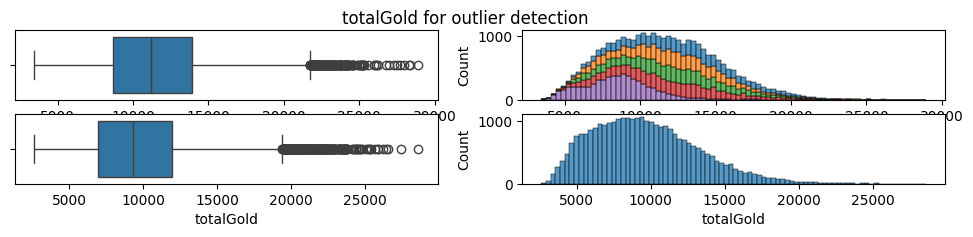

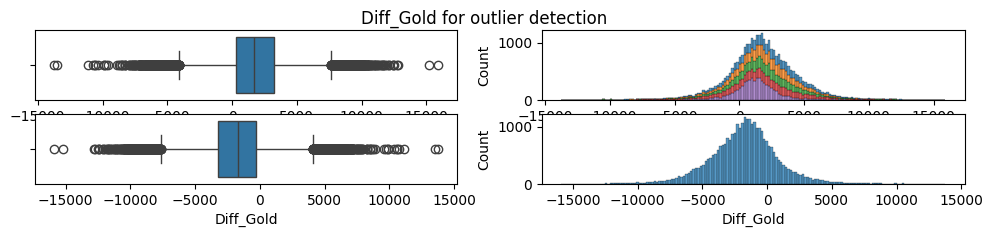

In [120]:
# Check data if the data return to normal disturbation
outlierploter(encoded_df, "totalGold")
outlierploter(encoded_df, "Diff_Gold")

<Axes: xlabel='totalGold', ylabel='Count'>

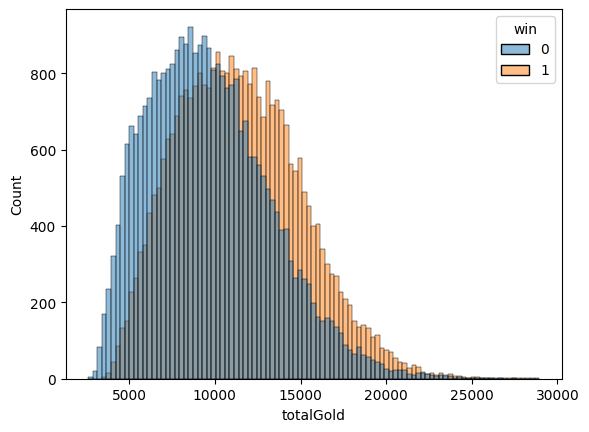

In [121]:
sns.histplot(encoded_df, x = "totalGold", hue = "win")

In [122]:
encoded_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'matchID', 'timestamp', 'puuid', 'teamID',
       'ID', 'win', 'championId', 'championName', 'TeamPosition',
       'individualPosition', 'totalGold', 'currentGold', 'xp', 'level',
       'dragon', 'horde', 'riftherald', 'baron_nasher', 'Tier',
       'timestamp_min', 'Teamdragon', 'diff_dragon_from_lose', 'Teamhorde',
       'diff_horde_from_lose', 'Teamriftherald', 'diff_riftherald_from_lose',
       'Teambaron_nasher', 'diff_baron_nasher_from_lose', 'Diff_dragon',
       'Diff_horde', 'Diff_riftherald', 'Diff_baron_nasher',
       'diff_Gold_from_lose', 'Diff_Gold', 'TeamPosition_JUNGLE',
       'TeamPosition_MIDDLE', 'TeamPosition_TOP', 'TeamPosition_UTILITY'],
      dtype='object')

In [123]:

# Create x, y for modeling
x = encoded_df.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "matchID", "puuid", "ID", "win", "championId", "championName", "TeamPosition", "individualPosition", "xp", "level", "dragon", "horde", "riftherald", "baron_nasher", "Tier", "timestamp_min", "diff_horde_from_lose", "diff_riftherald_from_lose", "diff_dragon_from_lose", "diff_baron_nasher_from_lose", "diff_Gold_from_lose"])
y = encoded_df['win']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [124]:
# Logistic regression is for analyzing and 
log_clf = LogisticRegression(random_state = 0, max_iter = 800).fit(x_train, y_train)

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
# Make the prrediction of x_test
y_pred = log_clf.predict(x_test)

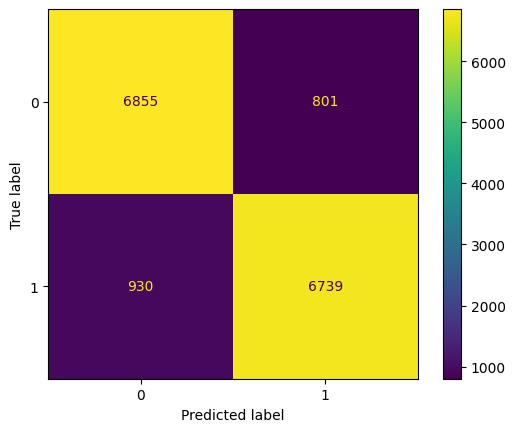

In [126]:
# Logistic Regression
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)
log_disp.plot()
plt.show()

In [127]:
target_labels = ["Lose", "Win"]
print(classification_report(y_test, y_pred, target_names = target_labels))

              precision    recall  f1-score   support

        Lose       0.88      0.90      0.89      7656
         Win       0.89      0.88      0.89      7669

    accuracy                           0.89     15325
   macro avg       0.89      0.89      0.89     15325
weighted avg       0.89      0.89      0.89     15325



In [128]:
pd.DataFrame(
    data = {
        "Feature Name" : log_clf.feature_names_in_, 
        "Model Coefficient" : log_clf.coef_[0]
        }
    ).sort_values(by = "Model Coefficient", ascending = False)

,Feature Name,Model Coefficient
8,Diff_dragon,6.530541e-01
4,Teamdragon,3.297850e-01
11,Diff_baron_nasher,2.991485e-01
7,Teambaron_nasher,1.535639e-01
10,Diff_riftherald,1.405142e-01
9,Diff_horde,1.382373e-01
6,Teamriftherald,6.953661e-02
5,Teamhorde,4.226451e-02
15,TeamPosition_TOP,1.779778e-03
14,TeamPosition_MIDDLE,1.481864e-03


In [129]:
# Random Forest Classifiier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
target_labels = ["Loxe", "Win"]
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9197
           1       0.93      0.93      0.93      9193

    accuracy                           0.93     18390
   macro avg       0.93      0.93      0.93     18390
weighted avg       0.93      0.93      0.93     18390

Accuracy: 0.9295812941816205


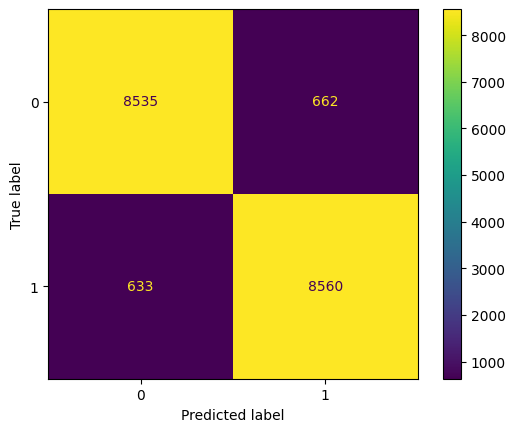

In [130]:
rf_cm = confusion_matrix(y_test, y_pred, labels = rf_model.classes_)
rf_disp = ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = rf_model.classes_)
rf_disp.plot()
plt.show()

In [131]:
# Get the feature importances
feature_importances = rf_model.feature_importances_

# Create a dataframe of features and their importance scores
pd.DataFrame(
    data = {
    'Feature': x_train.columns,
    'Importance': feature_importances
    }
    ).sort_values(by = 'Importance', ascending = False)

,Feature,Importance
12,Diff_Gold,0.247999
11,Diff_baron_nasher,0.147251
8,Diff_dragon,0.145184
3,currentGold,0.101593
4,Teamdragon,0.074068
0,timestamp,0.064476
7,Teambaron_nasher,0.051540
2,totalGold,0.047571
9,Diff_horde,0.029593
10,Diff_riftherald,0.024625


In [132]:
# def histploter(column, **kwargs):
#     plt.figure(figsize = (7, 6))
#     plt.title(f"histplot of {column}")
#     plt.xticks(fontsize = 9)
#     plt.yticks(fontsize = 9)
#     sns.histplot(data = encoded_df, x = column, hue = "win", multiple = "dodge", legend = None, **kwargs)
#     plt.show()

# histploter("Teamdragon")
# histploter("Teamriftherald")
# histploter("Teamhorde")
# histploter("Teambaron_nasher")
# histploter("level")
# histploter("totalGold")
# histploter("Diff_Gold")